In [13]:
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

review       0
sentiment    0
dtype: int64


In [8]:
# Convert to lowercase and remove special characters
def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['review'] = df['review'].apply(normalize_text)

In [12]:
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])

# Convert to sequences
sequences = tokenizer.texts_to_sequences(df['review'])

# Padding/Truncating sequences
padded_sequences = pad_sequences(sequences, padding='post', truncating='post', maxlen=100)

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

df['review'] = df['review'].apply(remove_stop_words)

In [16]:
df.head(5)

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [17]:
# EDA

In [24]:
! pip install wordcloud matplotlib


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

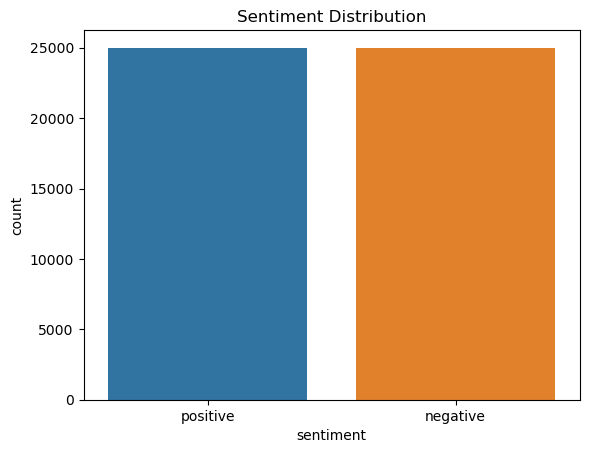

In [20]:
# Plot sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

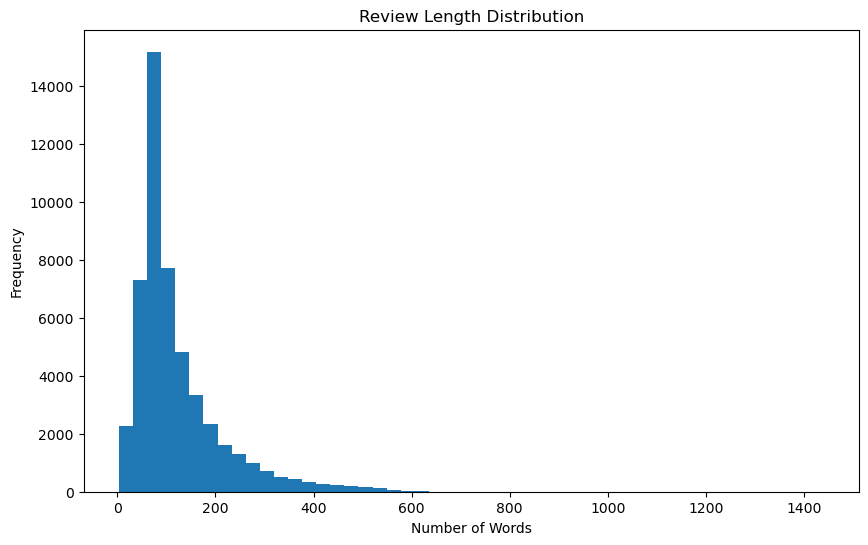

In [22]:
# Calculate review lengths
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(10,6))
plt.hist(df['review_length'], bins=50)
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


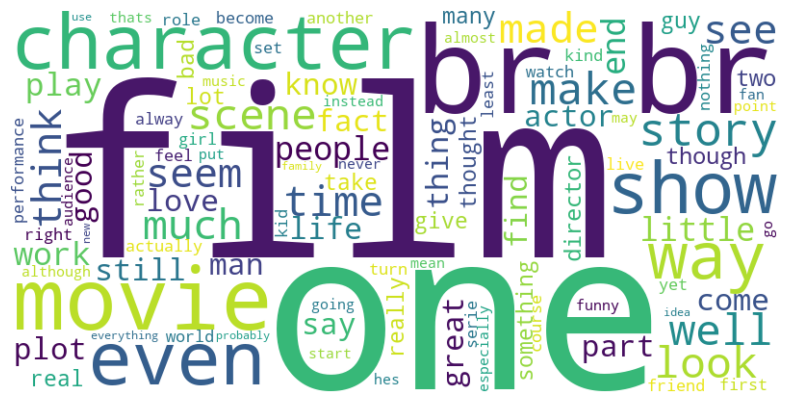

In [26]:
# Combine all reviews from the 'review' column into a single string
text = " ".join(review for review in df['review'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axes
plt.show()

In [29]:
# Loading dataset into mongodb

In [30]:
! pip install pymongo

  Obtaining dependency information for pymongo from https://files.pythonhosted.org/packages/02/68/b71c4106d03eef2482eade440c6f5737c2a4a42f6155726009f80ea38d06/pymongo-4.10.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for dnspython<3.0.0,>=1.16.0 from https://files.pythonhosted.org/packages/87/a1/8c5287991ddb8d3e4662f71356d9656d91ab3a36618c3dd11b280df0d255/dnspython-2.6.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/876.5 kB ? eta -:--:--
   ----------- ---------------------------- 256.0/876.5 kB 5.2 MB/s eta 0:00:01
   ----------------------------- ---------- 655.4/876.5 kB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 876.5/876.5 kB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/307.7 kB ? eta -:--:--
   ---------------------------------------  307.2/307.7 kB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 307.7/307.7 kB 6.3 MB/s eta 0:00:00


In [31]:
from pymongo import MongoClient

In [32]:
# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')  # Adjust the connection string if needed
db = client['assignment']  # Database name
collection = db['reviews']       # Collection name

# Prepare data for insertion
data_to_insert = []
for index, row in df.iterrows():
    data_to_insert.append({
        "review": row['review'],       # Review text
        "sentiment": row['sentiment'], # Sentiment of the review
    })

# Insert data into MongoDB
collection.insert_many(data_to_insert)

print("Data inserted successfully!")

Data inserted successfully!


In [33]:
# Create an index on the 'sentiment' field
collection.create_index([('sentiment', 1)])  # 1 for ascending order

'sentiment_1'

In [34]:
# Find all positive reviews
positive_reviews = collection.find({"sentiment": "positive"})

for review in positive_reviews:
    print(review)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

